<a href="https://colab.research.google.com/github/nitish6121999/Capstone-project-Mobile-Price-Range-Prediction/blob/main/Classification_Capstone_project_Mobile_Price_Range_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description**

##### **Project Type**    - Classification
##### **Contribution**    - Individual
#####**Project Title**    - Mobile Price Range Prediction

#####**Created by**       - Nitish N Naik


# **Project Summary -**

The Mobile Price Range Prediction project is an initiative to develop a robust machine learning model that can accurately predict the price range of mobile phones based on their various features and specifications. The objective of this project is to empower consumers with valuable information and assist them in making informed decisions when purchasing mobile devices.

The project encompasses several key steps, starting with the collection of a comprehensive dataset containing information about mobile phones, including features such as battery_power	blue	clock_speed	dual_sim	fc	four_g	int_memory	m_dep	mobile_wt	n_cores	px_height	px_width	ram	sc_h	sc_w	talk_time	three_g	touch_screen	wifi and the dataset also includes the corresponding price range for each mobile phone.


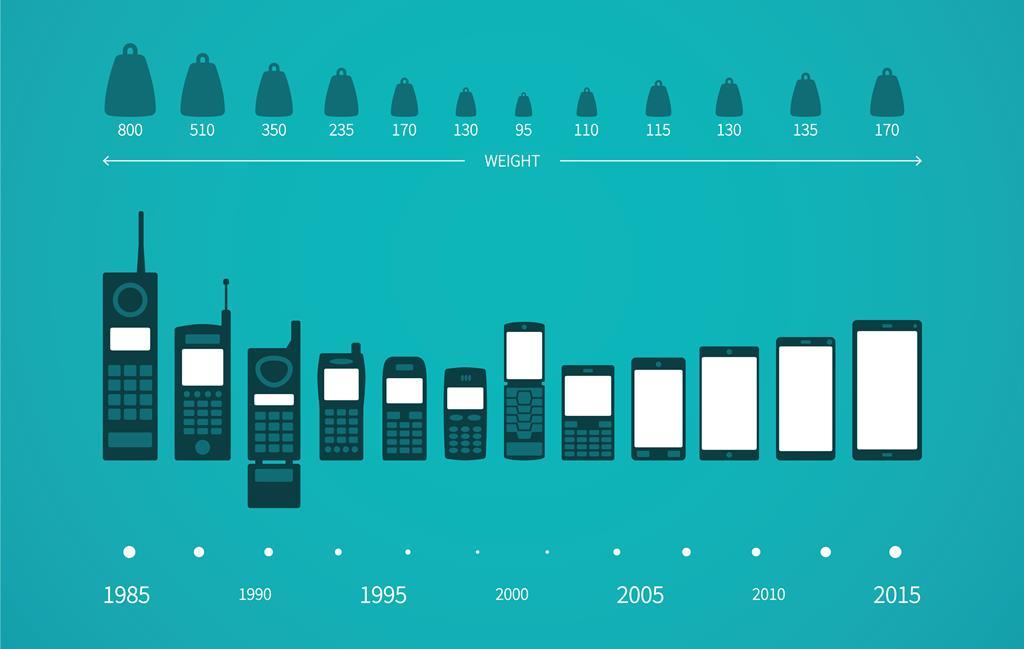

# **GitHub Link -**

https://github.com/nitish6121999/Capstone-project-Mobile-Price-Range-Prediction

# **Problem Statement**


The problem at hand is the difficulty faced by consumers in determining the price range of mobile phones based on their features and specifications. With numerous mobile phone options available in the market, consumers often find it challenging to assess the appropriate price range for a given set of features, leading to confusion and potential overspending.

By providing consumers with a predictive model that takes into account various features and specifications, the project would enable them to make more informed choices that align with their budget constraints and desired mobile phone attributes. Ultimately, the Mobile Price Range Prediction model aims to enhance the consumer experience by reducing confusion and increasing transparency in the mobile phone market.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
mobdf=pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECTS/Project: Classification ML: Mobile Price Range Prediction /dataset/data_mobile_price_range.csv")

### Dataset First View

In [ ]:
# Dataset First Look
mobdf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
mobdf.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
mobdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
mobdf.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
mobdf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'location of missing values')

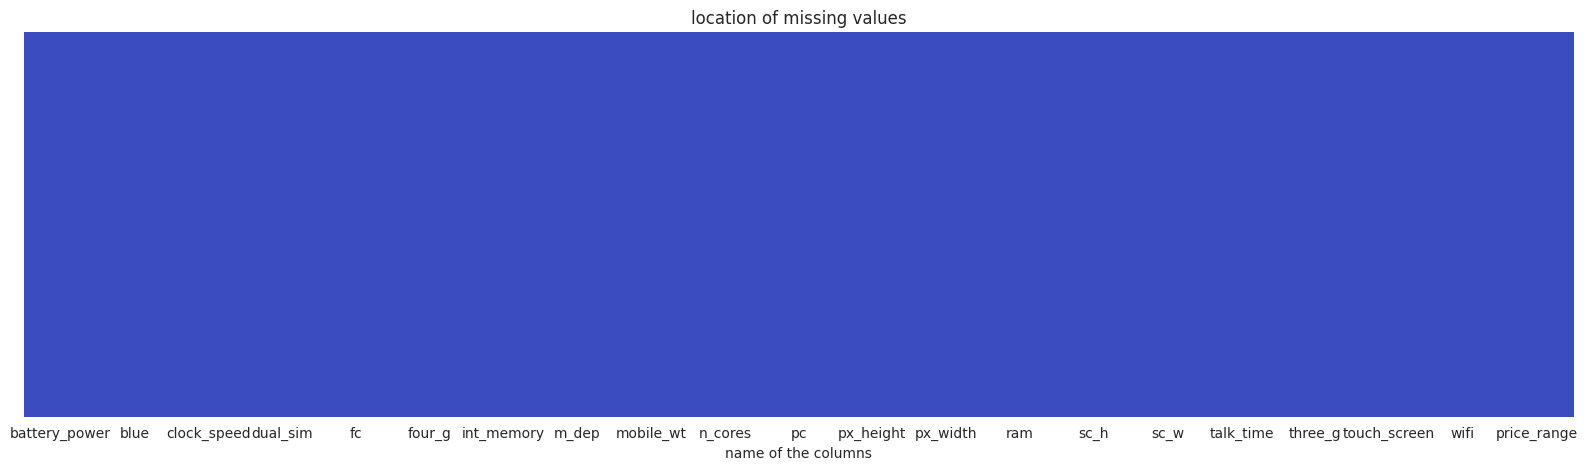

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(20,5))
sns.heatmap(mobdf.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')
plt.xlabel('name of the columns')
plt.title('location of missing values')

### What did you know about your dataset?

There are no Duplicate and Null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
mobdf.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
mobdf.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not,  

Clock_speed - speed at which microprocessor executes instructions,

Dual_sim - Has dual sim support or not,

Fc - Front Camera mega pixels,

Four_g - Has 4G or not,

Int_memory - Internal Memory in Gigabytes,

M_dep - Mobile Depth in cm,

Mobile_wt - Weight of mobile phone,

N_cores - Number of cores of processor,

Pc - Primary Camera mega pixels,

Px_height - Pixel Resolution Height,

Px_width - Pixel Resolution Width,

Ram - Random Access Memory in Mega,

Touch_screen - Has touch screen or not,

Wifi - Has wifi or not,

Sc_w - Screen Width of mobile in cm,

Talk_time - longest time that a single battery charge will last when you are over a call

 Three_g - Has 3G or not,

 Wifi - Has wifi or not,

 Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
mobdf.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

print(len(mobdf[mobdf.px_height==0]))
print(len(mobdf[mobdf.px_width==0]))
print(len(mobdf[mobdf.sc_h==0]))
print(len(mobdf[mobdf.sc_w==0]))

2
0
0
180


In [ ]:
mobdf['sc_w'][mobdf[mobdf.sc_w==0].index]=mobdf.sc_w.mean()
mobdf['px_height'][mobdf[mobdf.px_height==0].index]=mobdf.px_height.mean()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Chart 1 : Price Range Distribution graph**

Text(0.5, 1.0, 'price range data distribution')

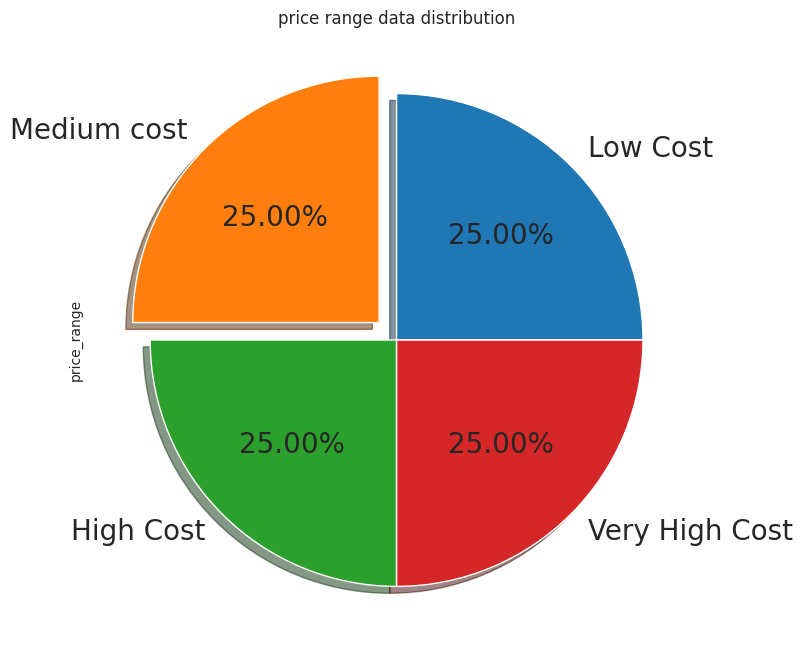

In [ ]:
mobdf_pricerange=mobdf['price_range'].value_counts().plot.pie(explode=[0, 0.1, 0, 0],labels= ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost'],autopct='%1.2f%%',shadow=True,figsize=(12,8),fontsize=20)
plt.title('price range data distribution')



##### 1. Why did you pick the specific chart?

This shows the price range distrubuted values in percentage .

##### 2. What is/are the insight(s) found from the chart?

We have the price data distributed equally in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Price range plays the major role in the bussiness impact ,this main deals with the consumer product relationship in the bussiness.

# **Chart - 2 Price range vs Bluetooth**

In [ ]:
# Chart - 2 visualization code
from pandas.core.groupby.groupby import GroupBy
Group_by=mobdf.groupby(['blue'])['price_range'].sum().reset_index()
Group_by

,blue,price_range
0,0,1492
1,1,1508


Text(0.5, 1.0, 'bluetooth')

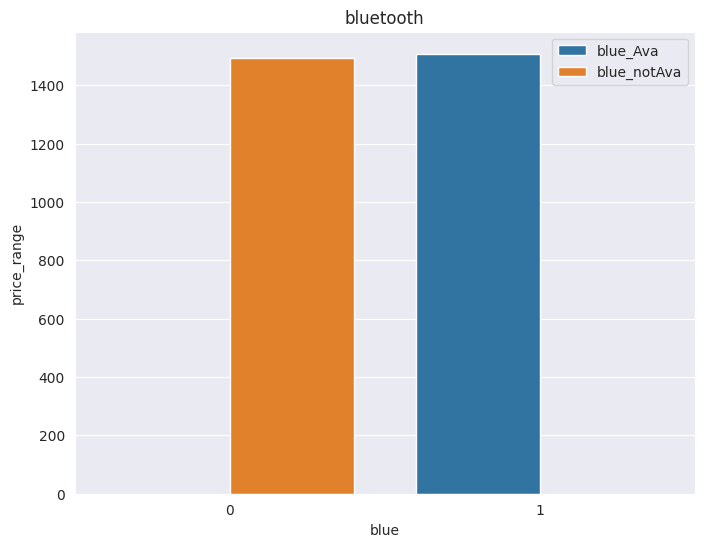

In [ ]:
plt.figure(figsize=(8,6))
legend=['blue_Ava','blue_notAva']
sns.barplot(x='blue',y='price_range',hue=legend,data=Group_by.sort_values(by='price_range',ascending=False))
plt.title('bluetooth')


##### 1. Why did you pick the specific chart?

Column chart explians the requiremnet since bluetooth has only two options ie avalability or not.

##### 2. What is/are the insight(s) found from the chart?

The Bluethooth data of avalability or not is almost equally distributed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# **Chart - 3 Price range distribution for Battery Power**

Text(0.5, 1.0, 'Price range distribution for Battery Power')

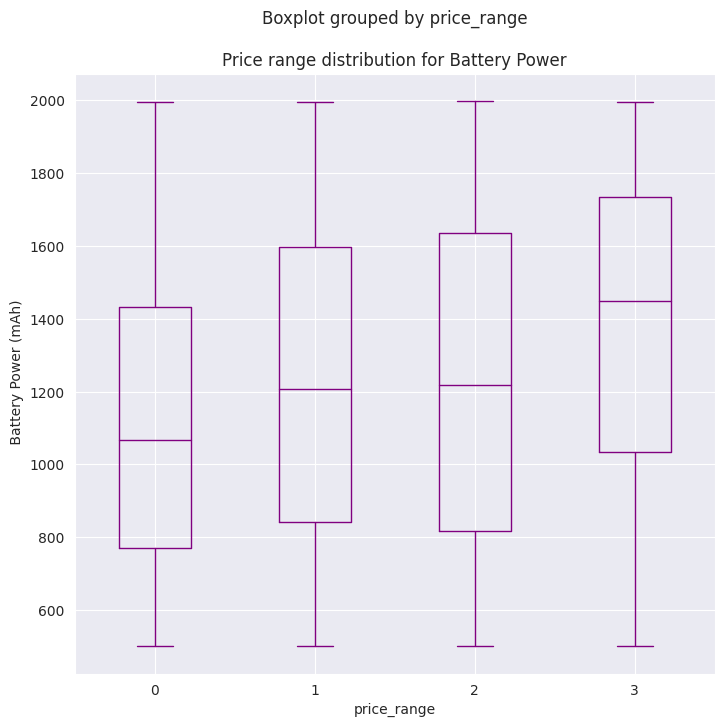

In [ ]:
# Chart - 3 visualization code
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['battery_power'], grid = True,figsize=(8,8),color='purple'),
plt.ylabel(" Battery Power (mAh)")
plt.title("Price range distribution for Battery Power")

##### 1. Why did you pick the specific chart?

Boxplot explains the chart for four different mobile price ranges .

##### 2. What is/are the insight(s) found from the chart?

Higher the battery capacity higher the price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers look for the long lasting phones and this does impact the business value.

# **Chart - 4  Price distributions for the Networks

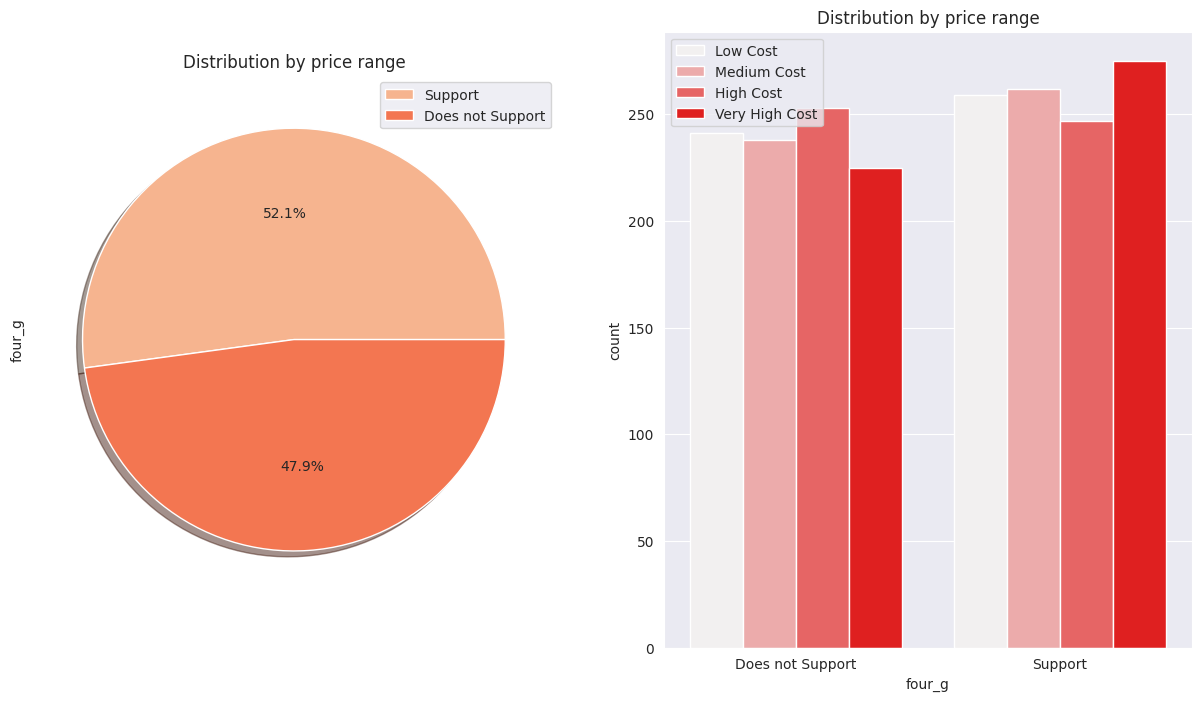

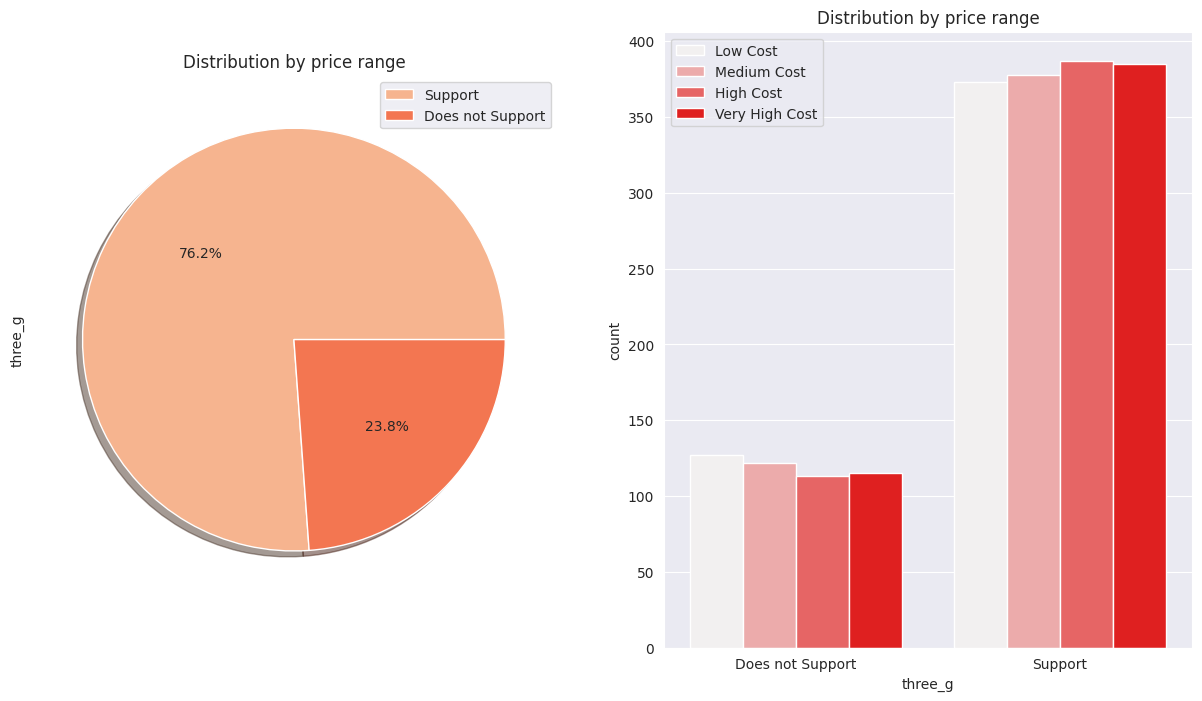

In [ ]:
# Chart - 4 visualization code

networks = [ 'four_g', 'three_g']
for dataset in networks:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 8))
  palette=sns.color_palette('rocket_r')

  mobdf[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = mobdf, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

Pie chart shows the percentage value of the network avalability in the phone

While columns chart explains price distirbutions according to their supportivity.

##### 2. What is/are the insight(s) found from the chart?

Avalability of the Network and their speed plays in role in the price range  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers lookin for the good network phones this impacts the price range of the phone.

# **Chart - 5 RAM vs the price range**

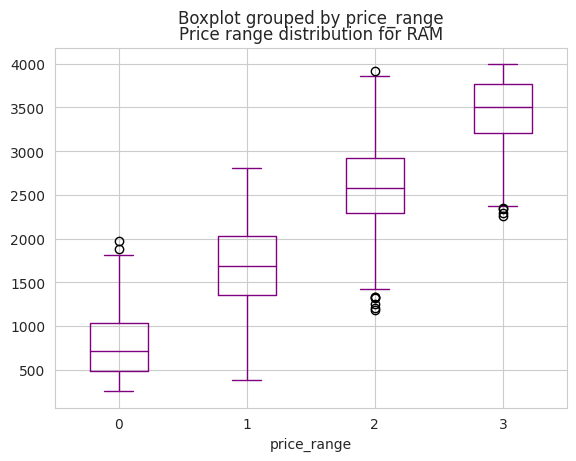

In [ ]:
# Chart - 5 visualization code
sns.set_style('whitegrid')
mobdf.boxplot(by='price_range', column=['ram'],color='purple', grid=True)
plt.title('Price range distribution for RAM')
plt.show()

##### 1. Why did you pick the specific chart?

Price ranges can be understood properly in this chart.

##### 2. What is/are the insight(s) found from the chart?

Ram plays the major role in the price range ,higher the RAM higher is the price range of the phone

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers look for the speed ,multitasking phones in this generation , where in RAM plays the role resulting in costlier phones .

# **Chart - 6 Pixel width and Height vs price range**

Text(0, 0.5, 'px_height')

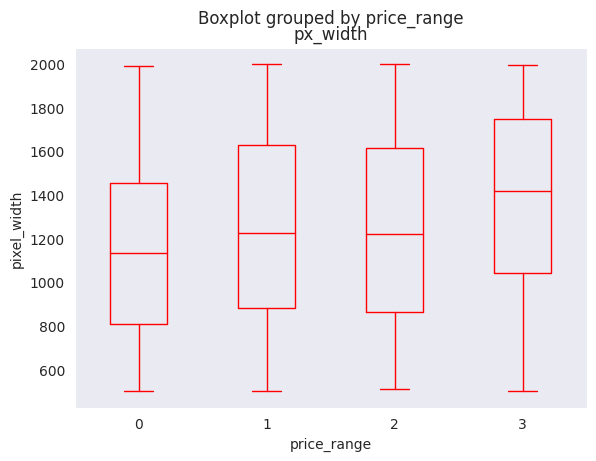

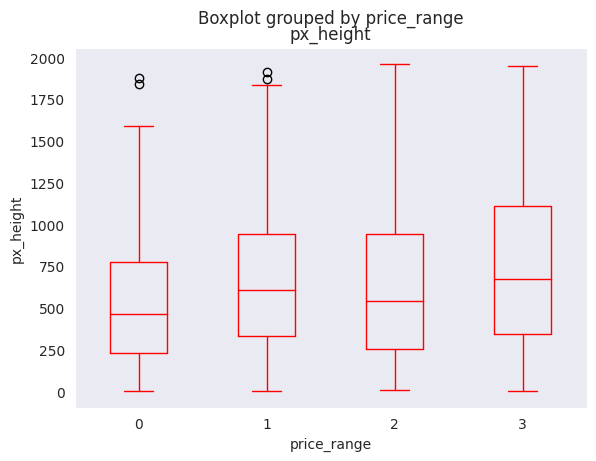

In [ ]:
# Chart - 6 visualization code
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['px_width'], grid = False,color='red'),
plt.ylabel("pixel_width")


#pixel Hight
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['px_height'], grid = False,color='red'),
plt.ylabel("px_height")

##### 1. Why did you pick the specific chart?

Price ranges can be understood properly in this chart.

##### 2. What is/are the insight(s) found from the chart?

Price ranges lineraly with increase in both pixel height and width of the phone

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is clear from the graph that both the features help in price range of the phones.

# **Chart - 7 Camera vs the Price range**

<Axes: xlabel='price_range', ylabel='pc'>

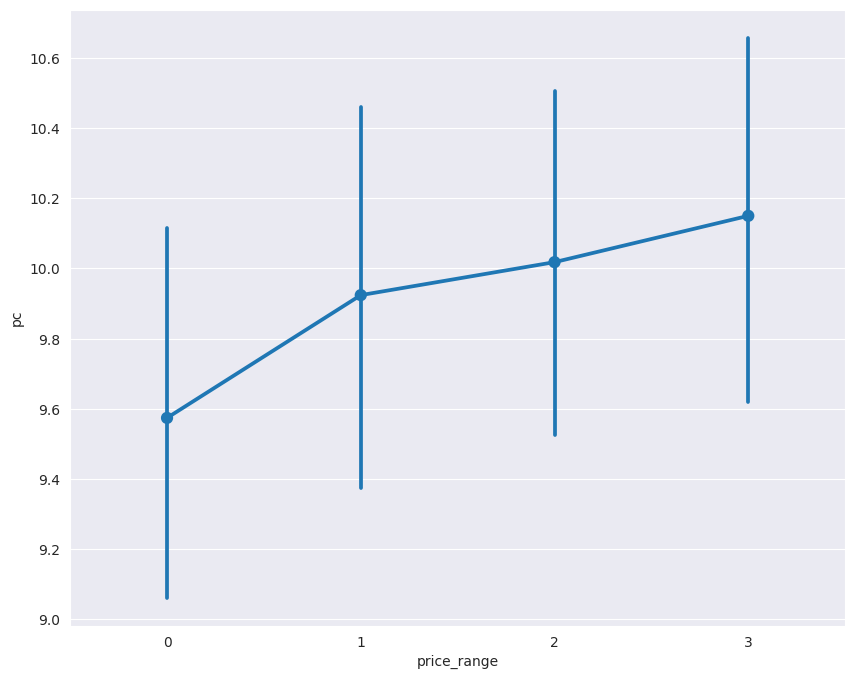

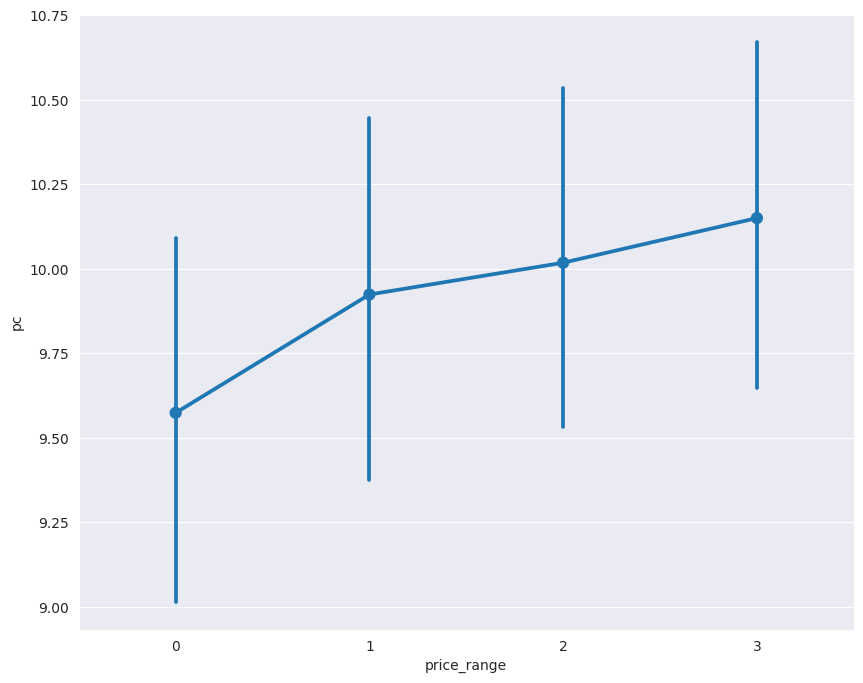

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(10,8))
sns.pointplot(y="pc", x="price_range", data=mobdf)

plt.figure(figsize=(10,8))
sns.pointplot(y="pc", x="price_range", data=mobdf)


FC (front camera megapixels) and PC (Primary camera Megapixels) features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

##### 1. Why did you pick the specific chart?

Column charts explains the requirement .

##### 2. What is/are the insight(s) found from the chart?

Be it the rear camera or the front camera , the price range varies accordingly with the features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Camera is the feature very Customer is interested in the phones ,so this is the positive impact to the business

# **Chart - 8 Screen Dimensions vs Price range**

Text(0, 0.5, 'Screen Width')

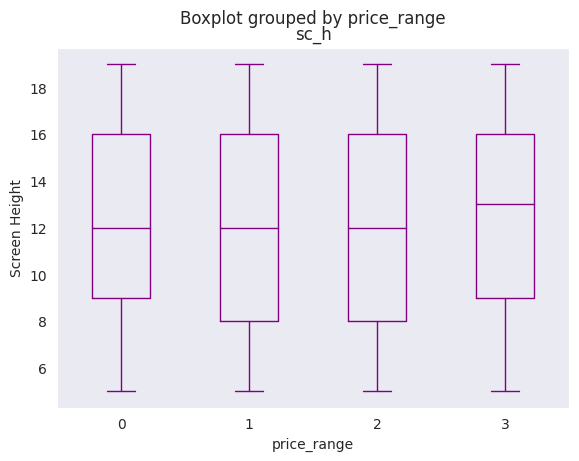

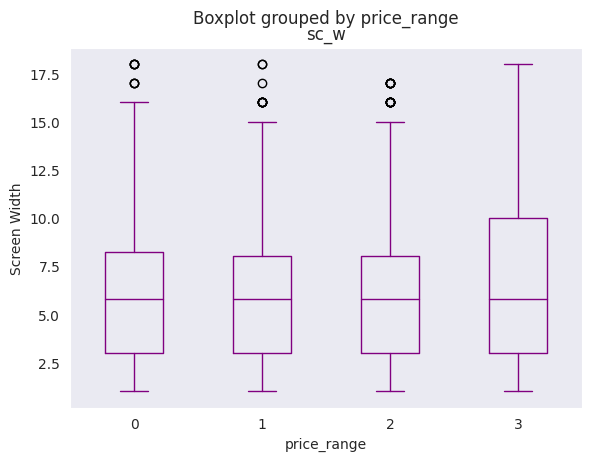

In [ ]:
# Chart - 8 visualization code
#Screen height
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['sc_h'], grid = False,color='purple'),
plt.ylabel("Screen Height")


#Screen Width
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['sc_w'], grid = False,color='purple'),
plt.ylabel("Screen Width")


screen width shows variation in the dataset and is useful in making predictions

##### 1. Why did you pick the specific chart?

Price ranges can be understood properly in this chart

##### 2. What is/are the insight(s) found from the chart?

For Screen width the data distribution is higher for the costlier phones , and for the Screen Height the data distributions is equal

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The phone dimensions have been increasing for phone on the yearly bases on the very New launch of the phone .

# **Chart - 9 Phone weight vs Price range**

<Axes: xlabel='price_range', ylabel='mobile_wt'>

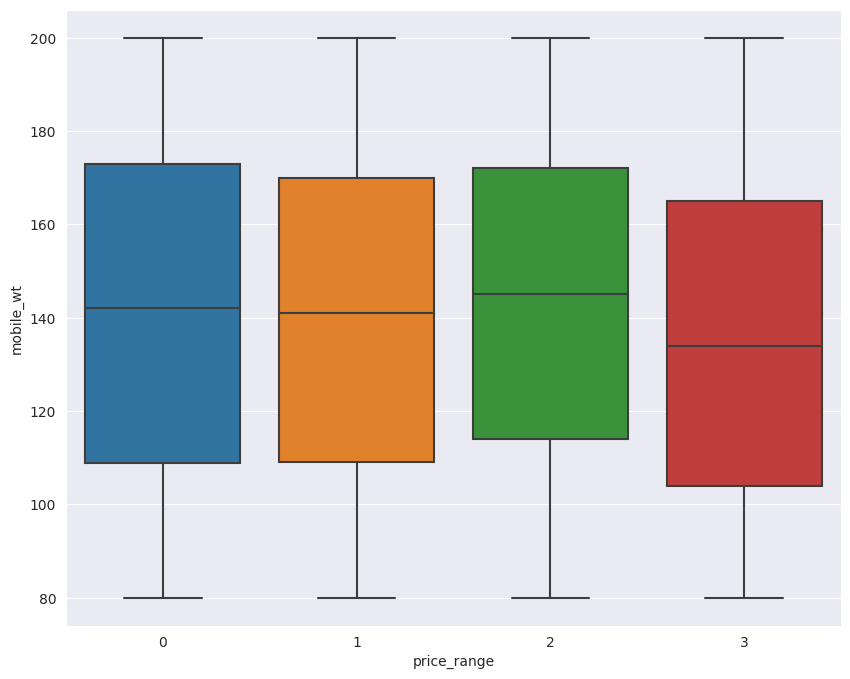

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,8))
sns.boxplot(x=mobdf['price_range'],y=mobdf['mobile_wt'])

Lighter mobiles are coslier than others

Customers prefer lighter phones in the market .

In [ ]:
#screen dimensions changes

mobdf['pixels']=mobdf['px_width']*mobdf['px_height']


#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4


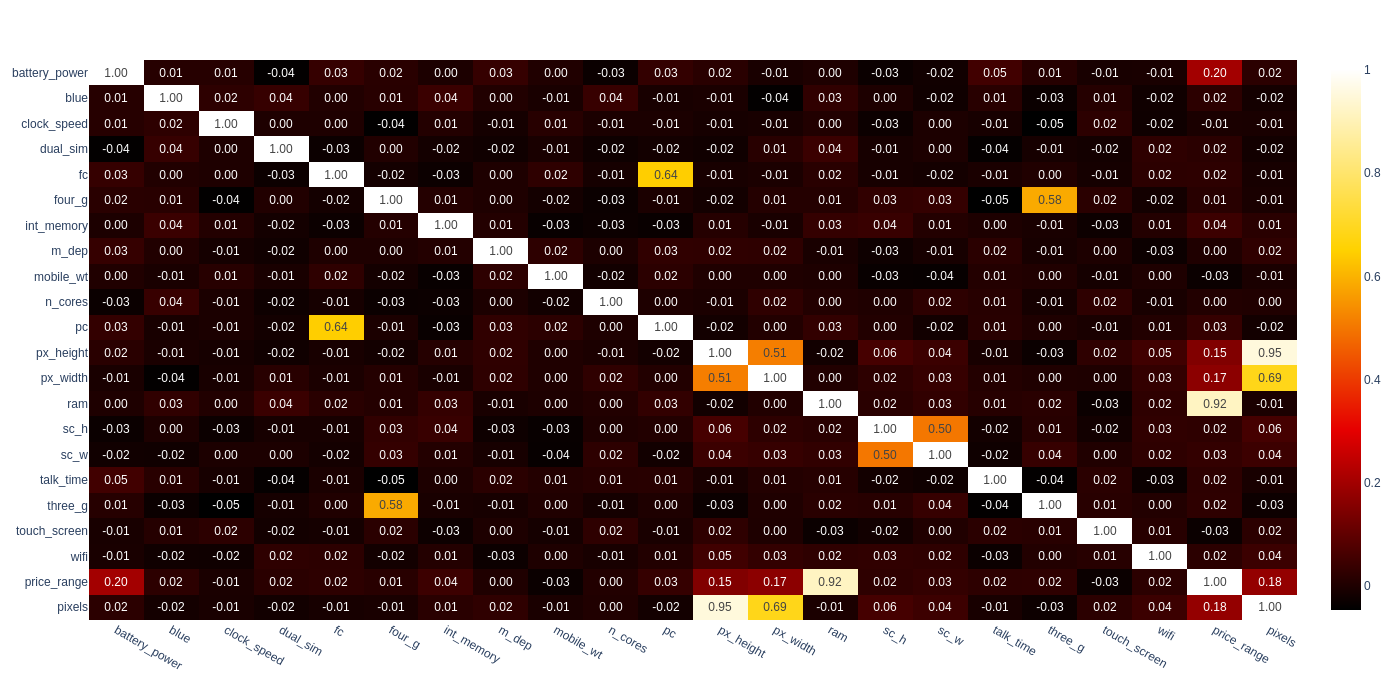

In [ ]:
corr = mobdf.corr()
import plotly.express as px
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show()
fig.show(renderer="png",width=1400, height=700)

##### 1. Why did you pick the specific chart?

In correlation heatmap RAM and price_range shows high
correlation(0.92) which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

front camera megapixels and Primary camera Megapixels are correlated then good chances that if front camera of a phone is good, the back camera would also be good.

There is some collinearity in feature pairs px_width', 'px_height.Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
mobdf.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'pixels'],
      dtype='object')

## 1.Defining the Dependent and Independent columns

In [ ]:
x=mobdf.drop(['price_range'],axis =1)
y=mobdf['price_range']

In [ ]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'pixels'],
      dtype='object')

In [ ]:
x.shape

(2000, 21)

In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
y.shape

(2000,)

## 2. Data Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

The MinMaxScaler is a data normalization technique commonly used in machine learning and data preprocessing tasks. It is used to scale numerical features within a specific range, typically between 0 and 1. The MinMaxScaler works by transforming the data in such a way that the minimum value of the feature becomes 0, and the maximum value becomes 1, while preserving the relative differences between other values.

### 3. Data Splitting

Data splitting is an essential step in machine learning and data analysis tasks. It involves dividing a dataset into separate subsets to facilitate model training, evaluation, and testing. The most common splits are between training, validation, and testing sets.

In [ ]:

# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest=(train_test_split(x_scaled, y, test_size = 0.25, random_state = 100))

In [ ]:
xtrain.shape,ytrain.shape

((1500, 21), (1500,))

In [ ]:
xtest.shape,ytest.shape

((500, 21), (500,))

##### What data splitting ratio have you used and why?

 The choice of data splitting ratio depends on various factors, including the size of the dataset, the availability of labeled data, the complexity of the problem, and the specific requirements of the task.

However, in general, common data splitting ratios are often used in machine learning projects. One common practice is to use an 80-20 or 70-30 split for the training and testing sets. That means allocating 70% or 80% of the data for training the model and reserving the remaining 30% or 20% for testing and evaluation.

## ***7. ML Model Implementation***

# **ML Model 1 : LOGISTIC REGRESSION**

While logistic regression is commonly used for binary classification, it can also be extended to handle multi-class classification problems.

In the context of multi-class logistic regression, the model predicts the probability of an instance belonging to each class within a set of multiple classes. The probabilities for each class are calculated separately using the logistic function, and the predicted class is typically determined by selecting the class with the highest probability.

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
Logr_model=LogisticRegression()
Logr_model.fit(xtrain,ytrain)

# Predict on the model
y_pred_train=Logr_model.predict(xtrain)
y_pred_test=Logr_model.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report
#A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

print('classification report for Logistic regression =')
print(classification_report(y_pred_test,ytest))

classification report for Logistic regression =
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       145
           1       0.77      0.90      0.83       105
           2       0.86      0.83      0.85       121
           3       0.98      0.94      0.96       129

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.91      0.90      0.90       500



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred_test)
print(cm)

[[134   1   0   0]
 [ 11  95  17   0]
 [  0   9 101   8]
 [  0   0   3 121]]


## Visualization of Confusion matrix for Logistic Regression

Text(0.5, 1.0, 'confusion matrix')

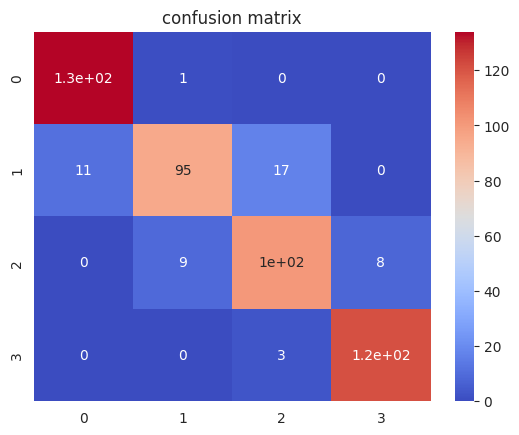

In [ ]:
vis=sns.heatmap(cm,annot=True ,cmap='coolwarm')
vis.set_title('confusion matrix' )

# **ML Model - 2 : Random Forest**

In classification tasks, Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree is built independently using a random subset of the training data and a random subset of the features. The final prediction of the Random Forest is determined by aggregating the predictions of individual trees through majority voting.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=400)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=400)

In [ ]:
y_pred2=rfc.predict(xtest)

In [ ]:
test_score=accuracy_score(ytest,y_pred2)
test_score

0.9

In [ ]:
print ('classification report for Random Forest (Test set) =')
print(classification_report(ytest,y_pred2))

classification report for Random Forest (Test set) =
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       135
           1       0.84      0.83      0.83       123
           2       0.85      0.84      0.85       118
           3       0.97      0.96      0.96       124

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



## Visualizing confusion matrix for Random forest

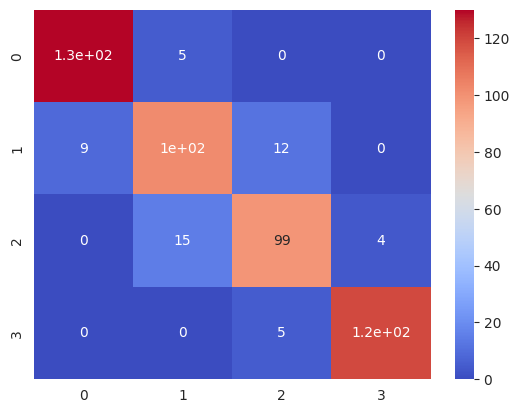

In [ ]:
cf_matrix=confusion_matrix(ytest,y_pred2)
vis2=sns.heatmap(cf_matrix,annot=True, cmap='coolwarm')

# **Feature Importance**

In [ ]:
feature_importance = pd.DataFrame({'Feature':x.columns,'Score':rfc.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.463774
1,battery_power,0.071278
2,pixels,0.053039
3,px_width,0.048580
4,px_height,0.046308
5,mobile_wt,0.037755
6,int_memory,0.035969
7,talk_time,0.029428
8,pc,0.027884
9,sc_h,0.026766


<Axes: xlabel='Score', ylabel='Feature'>

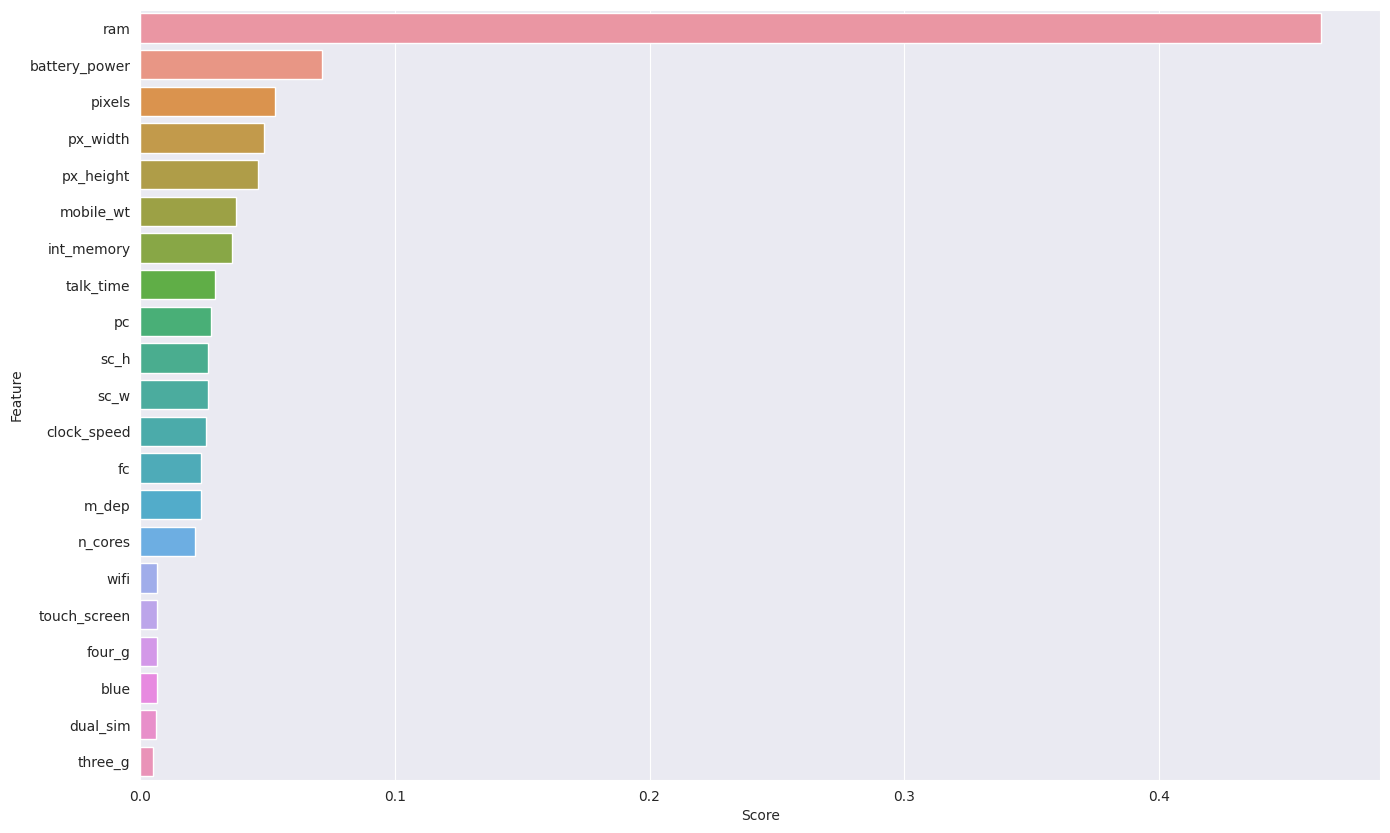

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x=feature_importance['Score'],y=feature_importance['Feature'])


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV.)
from sklearn.model_selection import GridSearchCV
HTRF = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
HRF = RandomForestClassifier()
CLSR = GridSearchCV(HRF, HTRF, scoring='accuracy', cv=3)

# Predict on the model

In [ ]:
# Fit the Algorithm
CLSR.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
CLSR.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
CLSR.best_estimator_

RandomForestClassifier(max_depth=40, max_leaf_nodes=40, n_estimators=200)

In [ ]:
CLSR.best_score_

0.8626666666666667

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=143)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, max_leaf_nodes=40, min_samples_split=4,
                       n_estimators=200)

In [ ]:
y_pred_rf=clsr.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8666666666666667

In [ ]:
print('Classification report for Hyperparameter tuning for Random Forest (Test set)= ')
print(classification_report(y_test, y_pred_rf))

Classification report for Hyperparameter tuning for Random Forest (Test set)= 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       139
           1       0.79      0.83      0.81       151
           2       0.87      0.76      0.81       153
           3       0.92      0.94      0.93       157

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



[[129  10   0   0]
 [ 16 126   9   0]
 [  0  23 117  13]
 [  0   0   9 148]]


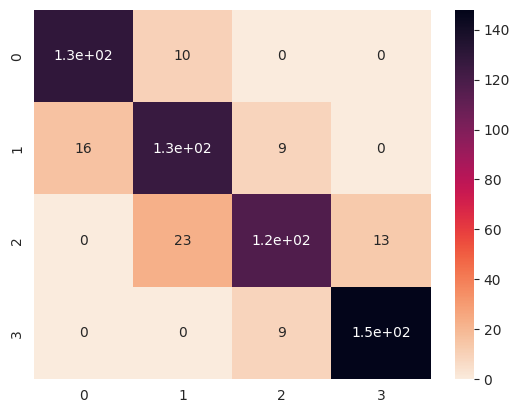

In [ ]:
CF_matrix = confusion_matrix(y_test, y_pred_rf)

print(CF_matrix)
vis = sns.heatmap(CF_matrix, annot=True, cmap='rocket_r')

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.640356
1,battery_power,0.064534
2,pixels,0.047188
3,px_width,0.039616
4,px_height,0.036020
5,mobile_wt,0.023121
6,int_memory,0.020746
7,sc_w,0.016193
8,pc,0.015186
9,sc_h,0.015141


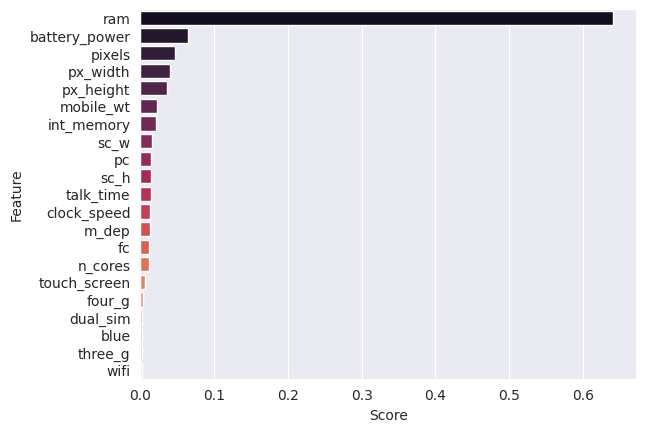

In [ ]:
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()


# **ML Model - 3  : DECISION TREE**

A decision tree is a machine learning algorithm used for classification tasks. It creates a tree-like model of decisions and their possible consequences by recursively partitioning the input data based on the values of input features. Each internal node of the tree represents a decision based on a specific feature, and each leaf node represents a class label or a class probability distribution.

In [ ]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(xtrain,ytrain)

# Fit and predict the Algorithm
y_pred3_test=dtc.predict(xtest)


In [ ]:
score =accuracy_score(ytest,y_pred3_test)
score

0.806

In [ ]:
print("classifcation report for decision tree classifier")
print(classification_report(y_pred3_test,ytest))

classifcation report for decision tree classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       133
           1       0.81      0.71      0.76       140
           2       0.65      0.68      0.67       113
           3       0.82      0.89      0.86       114

    accuracy                           0.81       500
   macro avg       0.80      0.81      0.80       500
weighted avg       0.81      0.81      0.81       500



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
DTgrid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
DTgrid.fit(xtrain,ytrain)
# Fit the Algorithm

# Predict on the model

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.787 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.790 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.813 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.760 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
y_pred3test=DTgrid.predict(xtest)

Evaluation metrics for test

In [ ]:
print('Classification Report for Decision Tree (test set)= ')
print(classification_report(ytest, y_pred3_test))

Classification Report for Decision Tree (test set)= 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       135
           1       0.71      0.81      0.76       123
           2       0.68      0.65      0.67       118
           3       0.89      0.82      0.86       124

    accuracy                           0.81       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.81      0.81       500



In [ ]:
cf_matrix=confusion_matrix(ytest,y_pred3_test)

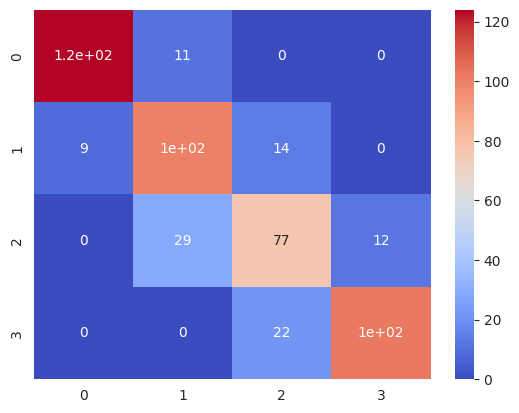

In [ ]:
vis=sns.heatmap(cf_matrix, annot=True , cmap='coolwarm')

Answer Here.

#**Model 4 : SUPPORT VECTOR MACHINE**

SVM, or Support Vector Machine, is a powerful machine learning algorithm used for classification tasks. It works by finding an optimal hyperplane that separates the data into different classes while maximizing the margin between the classes.

The key idea behind SVM is to find the hyperplane that maximizes the margin between the classes. The margin is defined as the distance between the hyperplane and the nearest data points from each class, known as support vectors. By maximizing the margin, SVM aims to achieve better generalization and robustness to unseen data.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [ ]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_pred4_test=svm.predict(xtest)

In [ ]:
print('Classification report for Support Vector Machine (Test set)= ')
print(classification_report(y_pred4_test, ytest))

Classification report for Support Vector Machine (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       134
           1       0.77      0.81      0.79       117
           2       0.86      0.79      0.83       129
           3       0.92      0.95      0.93       120

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



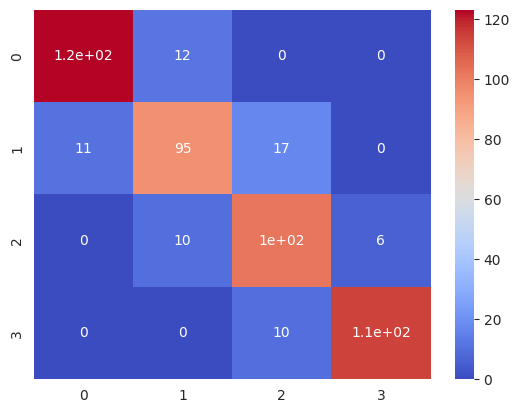

In [ ]:
CF_matrix = confusion_matrix(ytest, y_pred4_test)
vis=sns.heatmap(CF_matrix,annot=True, cmap='coolwarm')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When evaluating the positive business impact of a machine learning model, several evaluation metrics can be considered based on the specific goals and requirements of the business problem

Accuracy: Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correct predictions to the total number of predictions. It is a simple and intuitive metric, but it may not be suitable for imbalanced datasets where the classes are unevenly distributed.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest:

And reason why i have choosen Random Forest is because it is an ensemble model that combines multiple decision trees. It handles non-linear relationships, works well with high-dimensional data, and is robust against overfitting. It can capture complex interactions between features and provide estimates of feature importance.

# **Conclusion**

# **EDA Insights**

1.  For Bluethooth variable half the devices have Bluetooth, and half don’t

2.  There is a gradual increase in battery as the price range increases

3.  Ram has continuous increase with price range while moving from Low cost to Very high cost

4.  Costleir phones are lighter

5.  RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

# **Model Insights**

For Mobile price range prediction we have used

1.Logistic Regression

2.Random Forest

3.Decision Tree

4.Support Vector Machine

From the implemented models
the best-performing model among the implemented models is Logistic Regression. Here are the reasons:

Logistic Regression achieved the highest accuracy of 0.90, indicating that it correctly predicted the class labels for a significant portion of the test data.

The precision, recall, and F1-score for each class in the Logistic Regression classification report are generally high, indicating a good balance between correctly identifying positive and negative instances for each class.

While Random Forest and Support Vector Machine also achieved good accuracy scores, the evaluation metrics, such as precision, recall, and F1-score, for Logistic Regression appear to be slightly better.



   1.Logistic Regression

    accuracy                                     0.90       500
    macro avg                0.90      0.90      0.90       500
    weighted avg             0.91      0.90      0.90       500


  2.Random Forest

    accuracy                                     0.89       500
    macro avg                0.89      0.89      0.89       500
    weighted avg             0.89      0.89      0.89       500


    ** Random Forrest cross validation results **

    accuracy                                     0.86       600
    macro avg                0.86      0.86      0.86       600
    weighted avg             0.86      0.86      0.86       600


  3.Decision Tree

    accuracy                                     0.81       500
    macro avg                0.81      0.81      0.81       500
    weighted avg             0.81      0.81      0.81       500

    ** Decision tree cross validation results **

    accuracy                                     0.81       500
    macro avg                0.81      0.81      0.81       500
    weighted avg             0.82      0.81      0.81       500

  4.Support Vector Machine

    accuracy                                     0.87       500
    macro avg                0.87      0.87      0.87       500
    weighted avg             0.87      0.87      0.87       500

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***